In [146]:
# 주식:채권 포트폴리오 백테스팅
# 0.누적 수익률 차트 비교 
# 1.DrawDown 차트 비교 
# 2.MDD, CAGR 비교 

In [147]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import numpy as np

In [148]:
start_date = '20060101'
end_date = datetime.today()
TICKER = ['SPY', 'TLT']
df_price = data.get_data_yahoo(TICKER,start_date, end_date)['Adj Close']

In [149]:
df_price.head(10)

Symbols,SPY,TLT
Date,,
2006-01-03,93.085869,56.508205
2006-01-04,93.526703,56.643692
2006-01-05,93.585449,56.575935
2006-01-06,94.364265,56.471275
2006-01-09,94.606697,56.508205
2006-01-10,94.702194,56.052643
2006-01-11,95.003410,55.960243
2006-01-12,94.628738,56.335838
2006-01-13,94.540565,56.662178


In [150]:
df_rtn = df_price.pct_change().fillna(0)

In [151]:
pf_price = pd.DataFrame(index = df_price.index)
pf_price = pf_price.assign(fivefive = pd.Series(df_price[TICKER[0]]*0.5+df_price[TICKER[1]]*0.5))
pf_price = pf_price.assign(sixfour = pd.Series(df_price[TICKER[0]]*0.6+df_price[TICKER[1]]*0.4))
pf_price = pf_price.assign(seventhree = pd.Series(df_price[TICKER[0]]*0.7+df_price[TICKER[1]]*0.3))
pf_price = pf_price.assign(eighttwo = pd.Series(df_price[TICKER[0]]*0.8+df_price[TICKER[1]]*0.2))
pf_price = pf_price.assign(nineone = pd.Series(df_price[TICKER[0]]*0.9+df_price[TICKER[1]]*0.1))

pf_rtn = pd.DataFrame(index = df_rtn.index)
pf_rtn = pf_rtn.assign(fivefive = pd.Series(df_rtn[TICKER[0]]*0.5+df_rtn[TICKER[1]]*0.5))
pf_rtn = pf_rtn.assign(sixfour = pd.Series(df_rtn[TICKER[0]]*0.6+df_rtn[TICKER[1]]*0.4))
pf_rtn = pf_rtn.assign(seventhree = pd.Series(df_rtn[TICKER[0]]*0.7+df_rtn[TICKER[1]]*0.3))
pf_rtn = pf_rtn.assign(eighttwo = pd.Series(df_rtn[TICKER[0]]*0.8+df_rtn[TICKER[1]]*0.2))
pf_rtn = pf_rtn.assign(nineone = pd.Series(df_rtn[TICKER[0]]*0.9+df_rtn[TICKER[1]]*0.1))

pf_mdd = -(pf_price.cummax() - pf_price) / pf_price.cummax()

pf_cumrtn = ((1 + pf_price.pct_change()).cumprod() - 1).fillna(0)

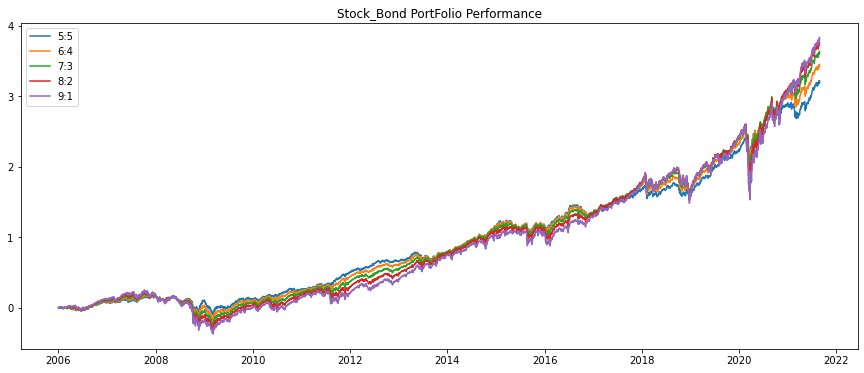

<AxesSubplot:xlabel='Date'>

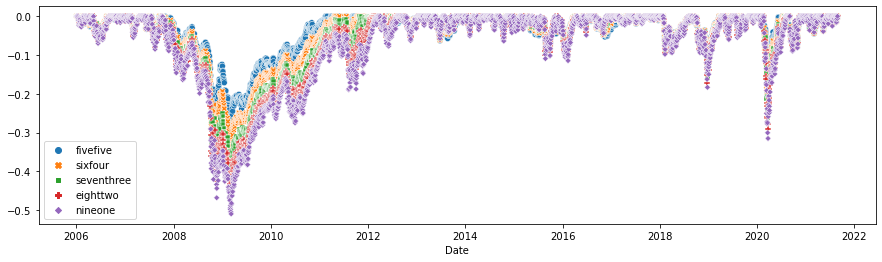

In [152]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,6))
plt.title('Stock_Bond PortFolio Performance')
plt.plot((1 + pf_rtn.fivefive).cumprod() - 1, label = '5:5')
plt.plot((1 + pf_rtn.sixfour).cumprod() - 1, label = '6:4')
plt.plot((1 + pf_rtn.seventhree).cumprod() - 1, label = '7:3')
plt.plot((1 + pf_rtn.eighttwo).cumprod() - 1, label = '8:2')
plt.plot((1 + pf_rtn.nineone).cumprod() - 1, label = '9:1')
plt.legend()
plt.show()

import seaborn  
plt.figure(figsize=(15,4)) 
seaborn.scatterplot(data=pf_mdd)

In [153]:
def get_mdd( x ):    
    arr = np.array( x )
    idx_lower = np.argmin( arr - np.maximum.accumulate( arr ) )
    idx_upper = np.argmax( arr[ :idx_lower ] )
    MDD = ( arr[ idx_lower ] - arr[ idx_upper ] ) / arr[ idx_upper ]
    return MDD
def get_cagr( x ):
    CAGR = ((x[len( x )-1] + 1) ** (252 / len( x )) - 1)
    return CAGR
def get_vol ( x ):
    VOL =  np.std( x ) * np.sqrt(252) 
    return VOL 
def get_srp ( x ):
    SRP =  np.mean( x ) / np.std( x )  * np.sqrt(252)
    return SRP 

In [154]:
MDD = []
CAGR = []
VOL = []
SRP = []
for i in range(0,len(pf_price.columns)):    
    df_mdd = get_mdd(pf_price.iloc[:,i]) * 100 
    df_cagr = get_cagr(pf_cumrtn.iloc[:,i]) * 100  
    df_vol = get_vol(pf_rtn.iloc[:,i]) * 100   
    df_srp = get_srp(pf_rtn.iloc[:,i])    
    MDD.append(df_mdd)
    CAGR.append(df_cagr)   
    VOL.append(df_vol) 
    SRP.append(df_srp) 

In [155]:
result = pd.DataFrame(data = np.array([MDD,CAGR,VOL,SRP]), index = ['MDD','CAGR','VOL','SRP'], columns = pf_price.columns)

In [156]:
result

,fivefive,sixfour,seventhree,eighttwo,nineone
MDD,-20.506698,-23.007964,-26.235984,-29.049761,-31.524223
CAGR,9.284721,9.619603,9.912139,10.170095,10.399407
VOL,9.482477,10.809716,12.674130,14.875085,17.284495
SRP,1.018151,0.937454,0.837345,0.745652,0.669423
